<center>
<img src="https://raw.githubusercontent.com/FUlyankin/r_probability/master/end_seminars_2020/sem08/real_expect.png" width="500">

# Андан на экономе: домашнее задание 4
</center>


> Если орел, я выиграла. Если решка, ты проиграл.

$\qquad$ $\qquad$ $\qquad$ $\qquad$  **[Рейчел из Друзей](https://www.youtube.com/watch?v=TV9ghItJ2Ms)**

**ФИО:** Глазман Михаил Денисович

## Общая информация

__Дата выдачи:__ 20.05.2024

__Дедлайн:__ 23:59MSK 10.06.2024

## Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 100 баллов. За каждый день просрочки после мягкого дедлайна снимается 10 баллов. После жёсткого дедлайна работы не принимаются. Даже при опозданиии на одну секунду. Сдавайте работы заранее.

Мягкий дедлайн можно отодвинуть без потери баллов на 1,2 или 3 дня. Суммарно для откладывания в запасе есть три дня. Можно отодвинуть один дедлайн на три дня, а можно три дедлайна подвинуть на один день. Распоряжаться этими днями студент может как угодно. Жёсткий дедлайн, при этом, не меняется. Если такое произошло, нужно сообщить о сдвиге при сдаче работы.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Любой из студентов может быть вызван на защиту любого домашнего задания. В таком случае итоговая оценка студента определяется в результате защиты.

> За отсутствие названий графиков и подписей к осям могут снижаться баллы. Все картинки должны быть самодостаточны и визуально удобны для восприятия, так чтобы не нужно было смотреть ваш код или знать задание, чтобы понять что на них изображено. Выводы должны быть релевантными. Не забывайте их писать. Если в вопросе требуется ответ словами, а его нет, вы будете терять довольно много баллов.

## Формат сдачи

Сам ноутбук называйте в формате hw-02-USERNAME.ipynb, где USERNAME — ваши фамилия и имя на латинице. Задание сдаётся в anytask.

In [1]:
import numpy as np
import pandas as pd

import scipy.stats as sts
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\m.glazman\AppData\Local\Temp\ipykernel_19648\2471143450.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Часть 1: обязательная 

За эту часть можно получить 100 баллов.

### Задача №1: Лучше найди себе девушку! (15 баллов)

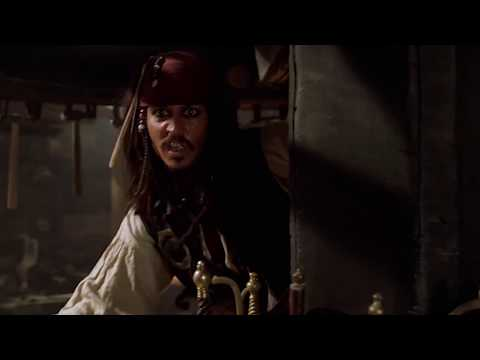

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo('ZQ0-anIcnzg', width=400, height=320)

В этой задаче вам предстоит проверить несколько гипотез на датасете из американского сервиса знакомств. Датасет называется `dating_is_hard.csv`

Колонки датасета:
- `age` - возраст
- `is_heavy_drinker` - алкоголизм в булевом виде
- `height` - рост в дюймах
- `sex` - полов может быть только два - f для женщин и m для мужчин.
- `smokes` - зависимость от табака в булевом виде
- `location` - место жительства
- `offspring` - отношение к детям

Для каждого пункта нужно расписать нулевую и альтернативную гипотезу, описать какой именно критерий вы используете, перечислить предпослыки необходимые для его использования, а также вычислить значение статистики и p-value, если это возможно.

In [5]:
df = pd.read_csv('dating_is_hard.csv')
df.head()

,Unnamed: 0,age,is_heavy_drinker,height,sex,smokes,location,offspring
0,uid_1,27,False,64,f,True,san francisco california,no opinion
1,uid_2,38,False,65,f,False,oakland california,wants kids
2,uid_3,31,False,70,m,True,san francisco california,does not have kids
3,uid_4,29,False,66,m,False,martinez california,does not have kids
4,uid_5,30,False,69,m,True,san francisco california,no opinion


__a) [5 баллов]__ Рост в приложениях для знакомств не проверяют, поэтому можно поставить себе любой и никто не узнает. Посмотрим же, врут ли люди о своём росте.

Проверьте две гипотезы: совпадает ли средний рост мужчин в приложении с их реальным средним ростом и совпадает ли средний рост женщин в приложении с их реальным средним ростом

__P.S.__ Средний рост мы вам не дамим. Ищите сами и приложите ссылку на источник в решении.

Средний рост мужчины: 66.9 дюймов, женщины 61.8 дюйм. 
Взял со статьи (https://dzen.ru/a/Y_tmoR51HBhrDuCw)

Наша нулевая гпиотеза - равенство матожидания чему-то. Мы не знаем дисперсию, будем предпологать, что наше распределение нормальное, т.к. наблюдений много, так что можем использовать ttest

In [9]:
w_height = df[df["sex"] == 'f']["height"]
w_ho = 61.8
sts.ttest_1samp(w_height, w_ho)

TtestResult(statistic=22.412674446928623, pvalue=1.3250646725764922e-72, df=399)

In [10]:
m_height = df[df["sex"] == 'm']["height"]
m_ho = 66.9
sts.ttest_1samp(m_height, m_ho)

TtestResult(statistic=28.956291249310905, pvalue=5.866400675370217e-116, df=599)

__Вывод:__ p-value меньше alpha, значит мы отвергаем нулевую гипотезу и для женщин и для мужчин, выборка смещена по росту (может быть например из-за того, что брали людей из какойй-то страны)

__б) [5 баллов]__ По моим наблюдениям (состоящим из одного человека) мужчин-алкоголиков гораздо больше женщин. В нашем датасете алкоголизмом мы будем считать параметр `is_heavy_drinker`

Проверьте гипотезу: Действительно ли доля мужчин-алкоголиков выше доли женщин-алкоголиков?

In [14]:
mens_drink = df[df["sex"] == 'm']["is_heavy_drinker"]
womens_drink = df[df["sex"] == "f"]["is_heavy_drinker"]
p1 = np.mean(mens_drink)
p2 = np.mean(womens_drink)
n1 = len(mens_drink)
n2 = len(womens_drink)
z_stat = (p1-p2)/np.sqrt(p1*(1-p1)/n1 + p2*(1-p2)/n2)
p_value = 2 * (1 - sts.norm.cdf(abs(z_stat)))
print(z_stat, p_value)

0.42710306202257 0.6693042627908694


__Вывод:__ Мы видим что p-value получилось больше чем 0.05, значит наблюдаемое значение лежит в 95% доверительном интервале и мы не можем отвергнуть нулевую гипотезу о равенстве долей.

__в) [5 баллов]__ Мой друг Володька решил бросить курить и теперь курит только когда пьёт. Это навело меня на мысль о том, что курение привлекает алкоголиков сильнее, чем обычных людей.

Проверьте гипотезу: Действительно ли алкоголики больше склонны к курению, чем неалкоголики?

In [16]:
alco = df[df["is_heavy_drinker"] == True]["smokes"]
non_alco = df[df["is_heavy_drinker"] == False]["smokes"]
p1 = np.mean(alco)
p2 = np.mean(non_alco)
n1 = len(alco)
n2 = len(non_alco)
z_stat = (p1-p2)/np.sqrt(p1*(1-p1)/n1 + p2*(1-p2)/n2)
p_value = 2 * (1 - sts.norm.cdf(abs(z_stat)))
print(z_stat, p_value)

0.6663007672410008 0.5052188752867566


**Вывод:** p_value больше alpha следовательно наблюдаемое значение меньше лежит в 95% доверительном интервале, а значит мы не можем отвергнуть нулевую гипотезу о равнетсве долей.

### Задача №2: Глаза и волосья (20 баллов)

 <img alt="Dark" src="img4.png" width=300, align = "center">

Учеными уже доказано, что цвет волос и глаз передается наследственно: генетически моно объянить от 61\% до 100\% вариации в этих показателях. В [исследовании](https://www.cambridge.org/core/journals/twin-research-and-human-genetics/article/genetic-overlap-between-hair-and-eye-color/FA37E967F280E4B313B171A326AAFBB3#article) решили определить, какие факторы, помимо гена пигментации (меланина), могут влиять на внешний вид людей. Эксперимент проводился в Нидерландах и данные о нем можно найти в файле dataTask2.csv).

Вам предстоит проанализровать зависимость двух показателей, располагающихся в соответсвующих колонках:

1. Цвет волос (`HairColor`)
- `Blond`
- `Red`
- `Brown`
- `Black`

2. Цвет глаз (`EyeColor`)

- `Brown` 
- `Grey`
- `Green`
- `Green brown`


In [17]:
df = pd.read_csv("data_hair_eye.csv", index_col = "Index")
df.head()

,EyeColor,HairColor
Index,,
0,Brown,Blond
1,Brown,Blond
2,Brown,Blond
3,Brown,Blond
4,Brown,Blond


**a) [3 балла]**. Вы имеете дело с "длинным" форматом данных, то есть каждой строке соответсвует одно наблюдение, а каждой колонке - отдельынй показатель. Теперь вам предстоит это изменить - перевести данные в формат таблицы сопряженности. Вспомнить ее вы можете из курса матстата, однако дополнительно можно почитать [здесь](https://mathworld.wolfram.com/ContingencyTable.html). Переведите данные в формат `contingency table`.

In [18]:
df_con = pd.crosstab(df['EyeColor'], df['HairColor'])
df_con

HairColor,Black,Blond,Brown,Red
EyeColor,,,,
Blue,4428,155040,21970,4595
Brown,11758,37102,31791,1671
Gray,4653,121157,22294,4000
Green brown,4682,35517,16763,1493


**б) [3 балла]**. Далее необходимо проанализировать данные. Выведите самый популярный цвет волос и самый популярный цвет глаз в выборке. Также выведите выборочные вероятностьи встретить эти характеристки в категориях, где они занимают наименьшую долю (в цветах глаз и в цветах волос соответственно). 

Интерпретируйте результаты относительно страны, в которой проводилось исследование. 

In [29]:
most_popular_eye_color = df["EyeColor"].value_counts().idxmax()
most_popular_hair_color = df["HairColor"].value_counts().idxmax()

'Blue'

**Вывод:**

**в) [3 балла]**. Визуализируйте распределение цветов глаз для каждого цвета волос. Попробуйте воспользоваться функцией [`mosaic()`](https://www.statsmodels.org/dev/generated/statsmodels.graphics.mosaicplot.mosaic.html), или же обычными столбчатыми графиками

In [ ]:
# your code here
# (⊙_⊙)

**Вывод:**

**г) [5 баллов]**. Рассчитайте суммы по столбцам, строкам, а также общую сумму. Рассчитайте тестовую $\chi^2$ для теста на независимость двух переменных. Определите степени свободы у распределения получившеся статистики, найдите критическое значение $\chi^2_{df}$ с помощью встроенной функции `.ppf()`

In [ ]:
# your thoughts here  
# (◕‿◕)♡

*Можете проверить себя, воспользовавшишь функцией `chi2_contingency()`*

**д) [3 балла]**. Постройте плотность распределения рассчитанной статистики, а найдите p-value точечной оценки, и обозначьте на графике. Также укажите несколько типичных уровней значимости $\alpha$ и нанесите их на график. Проинтерпретируйте результаты.

In [ ]:
# your code here
# (♡-_-♡) 

**Вывод**:

**е) [3 балла]**. Сделайте финальные выводы и при необходимости дополнительные расчеты, на которых они будут основываться. Есть ли стастистическая взаимосвязь между переменными. И если есть, то чем она может быть объяснена?

In [ ]:
# your code here
# (´｡• ᵕ •｡`) 

**Вывод**:

### Задача №3. Тестируем новый интерфейс страницы отеля  (25 баллов)

Все мы любим отдыхать! А злые корпорации любят наживаться на нашем желании отдыхать.

Представим что вы работаете в одной из таких корпораций и занимаетесь аналитикой сайта для бронирования отелей. Процесс бронирования имеет привычную структуру:
- вбиваете в поиск направленния и даты
- получаете выдачу вариантов отелей
- переходите на страницу отеля
- нажимаете кнопку "забронировать"
- попадаете на страницу оплаты
- оплачиваете

Очевидно, на всех этапах этой воронки вы можете потерять пользователя. Поисследовав поведение пользователей вы решили внести изменения на странице об отеле и хотите чтобы выросла конверсия в бронирования

__а) [3 балла]__ Подумайте, какие изменения могли бы быть внесены?

**Ваш ответ:**

Перед вами датасет `ab_test.csv`, в нем содержатся данные о пользователях в период теста

`user_id` - уникальный идентификатор пользователя \
`sex` - пол пользователя \
`datetime` - дата и время посещения сайта (начала сессии) \
`district` - регион расположения отеля \
`hotel_page` - был ли пользователь на странице отеля в сессии \
`payment_page` - был ли пользователь на странице оплаты в сессии \
`payment` - была ли произведена оплата в сессии \
`group` - группа в эксперименте

Поскольку изменения вносились на странице отеля нас интересуют именно дошедшие до этой страницы пользователи. Поэтому колонка `hotel_page` принимает значение 1 всегда

In [ ]:
df = pd.read_csv("data/ab_simpson.csv")
df.head()

__б) [3 балла]__ Сделайте небольшой eda, какие выводы вы можете сделать о данных? Корректно ли проводился аб тест? Найдите ошибки и объясните почему это некорректно.

In [ ]:
# your code here
# [✖‿✖]

Раскроем правду. Изменение продукта касалось адаптации страницы отеля под его регион. Например, в южных регионах пользователям на странице отеля предлагались активности для пляжного отдыха, а в северном и центральном регионе сразу подбирались ближайшие экскурсии и так далее.

__в) [5 баллов]__ Проанализируйте, как ведут себя конверсии в страницу оплаты и в оплату в разных регионах? Опишите выводы.

In [ ]:
# your code here
# ┌(ಠ_ಠ)┘

__г) [5 баллов]__ Проанализируйте, улучшилась ли воронка для пользователей в тестовой группе по сравнению с контрольной вне зависимости от региона? Опишите выводы.

In [ ]:
# your code here
# =^･ｪ･^=

__д) [5 баллов]__ Проанализируйте распределение интересов пользователей в тестовой и контрольной группе. Какими регионами они интересовались? Изменились ли их предпочтения?

In [ ]:
# your code here
# (⊙_⊙)

Если вы все сделали правильно, то у вас получился противоречивые ответы в пунктах 3 и 4. Вы попали в ловушку Парадокса Симпсона. Подробнее о нем можно почитать [здесь](https://ru.wikipedia.org/wiki/Парадокс_Симпсона)

<img src="https://github.com/hse-econ-data-science/andan_2023/blob/main/hw/hw04/images/simpson.jpg?raw=true" width="350" align='center'> 

__е) [4 балла]__ Теперь, когда вы все узнали, опишите кратко почему вы получили противоречивый результат в пунктах 3 и 4 (1 балл)

**Ваш ответ:**

## Задача №4: Не подглядывать! (40 баллов)

<img src="https://github.com/hse-econ-data-science/andan_2023/blob/main/hw/hw04/images/trump.png?raw=true" width="500" align='left'>

На американских выборах 2020 года в некоторых штатах проходила очень конкурентная борьба между кандидатами. По мере подсчета голосов перевес в голосах склонялся то в пользу демократов, то в пользу республиканцев. И вот, в один из таких моментов, когда чаша весов склонилась в пользу республиканцев, Д. Трамп написал в твиттер "stop the count!", что означало призыв к остановке подсчета голосов. 

_Здесь у вас мог возникнуть вопрос, и зачем нам это?_ 

Ответ очень прост. В этой ситуации всем очевидно, что призыв Трампа не мог быть осуществлен, то есть прерывать подсчет голосов раньше времени кажется довольно глупым способом выявления победителя. И вот абсолютно такой же способ принятия решения есть и в А/Б-тестах, только теперь многим аналитикам он уже кажется не столь очевидным, что приводит к существенным ошибкам в заключении выводов. 

_Решив эту задачу, мы познакомимся с такой проблемой подробнее и поймем, как не стоит делать, когда вы запускаете А/Б-тест._

Чтобы понять, в чем же именно заключается проблема, мы с вами будем проводить симуляции А/Б-тестов. Это когда мы генерируем данные уже со знаниями, как эти данные устроены. А затем, запуская процедуру проверки гипотез над такими симулированными данными, мы будем оценивать, что происходит на практике (при запуске А/Б-теста).

На практике же всегда неизвестно, как устроены данные, и проводя А/Б-тест мы пытаемся зафиксировать различия. Еще раз, здесь же мы будем знать об устройстве данных, а затем будем смотреть на поведение А/Б-теста, то есть как будто бы смотреть на тест с обратной стороны. 

_Перед тем как идти дальше, остановитесь здесь и еще раз зафиксируйте это!_

__а) [10 баллов]  Подсчет размера выборки для А/Б-теста__

Предположим, что вы хотите провести А/Б-тест внутри вашего приложения. Вы выбрали некоторую метрику $X$ – случайную величину из нормального распределения с мат. ожиданием $100$ у.е. и стандартным отклонением $40$ у.е – это ваш бейзлайн (группа А). Рассчитайте, сколько дней вам нужно крутить такой А/Б-тест, если:

1. Вы ожидаете получить минимальный размер эффекта в $5$ у.е.;
2. Вы хотите зафиксировать ошибку первого рода на уровне $\alpha=5\%$, а ошибку второго рода на уровне $\beta=20\%$;
3. Вы точно знаете, что в группе Б стандартное отклонение метрики составляет также $20$ у.е.
4. Посещаемость вашего приложения ежедневно составляет $200$ пользователей, и вы готовы раскатить тест на $100\%$ трафика.

Формула для расчета числа наблюдений _для одной группы_:

$$
n_{\text{one group}} = \frac{(\sigma_A^2 + \sigma_B^2) \cdot (z_{1-\frac{\alpha}{2}} + z_{1-\beta})^2}{MDE^2},
$$

__Подсказка:__ Помните, что после получения общего числа наблюдений вам нужно выразить это в дни! Вы должны получить целое число. Также будьте аккуратны с подсчетом трафика и кол-ва наблюдений – обратите внимание, со скольким числом групп вы работаете!

In [ ]:
# your code here
# (♡-_-♡) 

__б) [20 баллов] Симуляция А/Б-теста__

Теперь нам нужно запустить А/Б-тест. Для этого:

1. Сгенерируйте выборку данных из нормального распределения для группы А и Б в конкретный один день. Считайте, что в группе Б математическое ожидание составляет $105$ у.е., то есть с учетом размера вашего минимального ожидаемого эффекта из предыдущего пункта.

In [ ]:
# your code here
# ヽ(♡‿♡)ノ

2. Теперь представим, что наш тест был запущен $X$ дней. Напишите функцию, которая за этот период теста собирает в `DataFrame` следующие данные на каждый день теста: 
    1. среднее метрики в группе А
    2. среднее метрики в группе Б
    3. p-value, посчитанное с помощью t-test – можно воспользоваться встроенной функцией `scipy.stats.ttest_ind`
    
    Соберите `DataFrame` для $X=50$.
    
__Подсказка:__ Среднее для 1-го дня должно считаться по пользователям, пришедших в первый день, для второго дня – по пользователям, пришедшим в первый и второй день и т.д. То есть накопленным итогом за каждый день теста.

In [ ]:
# your code here
# (´｡• ᵕ •｡`) 

3. На основе `DataFrame` из предыдущего пункта постройте график динамики среднего в группе А и в группе Б по дням теста. Отложите вертикальную линию на этом же графике, показывающую кол-во дней, посчитанных в пункте 1. Сделайте эту линию пунктирной и измените цвет, который вам больше нравится.

In [ ]:
# your code here
# (´｡• ᵕ •｡`) 

4. На основе `DataFrame` из предыдущего пункта постройте график динамики p-value по дням теста. Отложите вертикальную линию на этом же графике, показывающую кол-во дней, посчитанных в пункте 1. Сделайте эту линию пунктирной и измените цвет, который вам больше нравится. Также отложите горизонтальную линию – ваш уровень значимости $\alpha$.

In [ ]:
# your code here
# (´｡• ᵕ •｡`) 

5. Перегенируруйте шаги 2-4 несколько раз, посмотрев на графики. Что вы видите? Что происходит с p-value в периодах:
    1. до кол-ва дней, посчитанных по формуле из п.1
    2. в точке кол-ва дней, посчитанных по формуле из п.1
    3. после кол-ва дней, посчитанных по формуле из п.1
    
    Опишите выводы максимально подробно.

In [ ]:
# your thoughts here  
# (◕‿◕)♡

6. Теперь предположим, что мы поменяли наш $MDE$ до $1$ у.е. То есть мат. ожидание в группе А осталось по-прежнему $100$, а вот в группе Б теперь $101$. Перегенерируйте пункты 2-4 для измененного $MDE$, при этом кол-во дней в п.1 не пересчитывайте. Что происходит с p-value? Сделайте выводы.

In [ ]:
# your code and thoughts here
# ♡ (´｡• ω •｡`) ♡

__в) [10 баллов] Симуляция А/А-теста__

Теперь представим, что изменений на самом деле никаких нету, то есть мат. ожидание в обоих группах $100$, а $MDE = 0$

1. И снова перегенерируйте вышесделанные пункты 2-4. Что происходит с p-value? Может ли оно оказаться ниже уровня значимости? 

In [ ]:
# your code and thoughts here
# =^･ｪ･^=

2. Ну и напоследок, напишите функцию, которая генерирует p-value на последний день A/A теста. А затем запустите эту функцию $1000$ раз, собрав $1000$ значений p-value. Постройте гистограмму их распределения. Что вы видите? 

__Подсказка:__ Для такой функции достаточно создать выборку один раз, изменив ее размер.

In [ ]:
# your code and thoughts here
# C (・_・)ノ